In [1]:
using CSV

In [2]:
using GaussianProcesses

In [3]:
using Statistics

In [4]:
x_prime_df=CSV.read("x_shuffled.csv", header=0)
y_prime_df=CSV.read("y_shuffled.csv", header=0)

,Column1
,Float64
1,2.64432e5
2,1.67688e5
3,6.70549e5
4,1.1592e5
5,6.93351e5
6,5.5556e5
7,188443.0
8,1.96863e5
9,4.8118e5


In [5]:
xprime = convert(Matrix,x_prime_df)
yprime = convert(Matrix,y_prime_df)

400×1 Array{Float64,2}:
 264432.25520764623       
 167688.41183851557       
 670549.1309412513        
 115919.8530580652        
 693350.508694783         
 555560.1098441511        
 188442.96715840694       
 196862.60159301193       
 481180.30510619          
 853647.0166223499        
 580936.4451294354        
 480871.4034428356        
 855955.6781931772        
      ⋮                   
 534234.1675322347        
 549584.2680083631        
 397004.1057001574        
 410824.6893967921        
 102427.80128575808       
 317454.0032188951        
 432703.8716610953        
 207019.8774613448        
      1.1939538005072905e6
 586269.1259098226        
 786013.4761361814        
 859230.0453506851        

In [6]:
x_train = convert(Matrix,x_prime_df[1:300,:])
y_train = convert(Matrix,y_prime_df[1:300,:])

300×1 Array{Float64,2}:
 264432.25520764623      
 167688.41183851557      
 670549.1309412513       
 115919.8530580652       
 693350.508694783        
 555560.1098441511       
 188442.96715840694      
 196862.60159301193      
 481180.30510619         
 853647.0166223499       
 580936.4451294354       
 480871.4034428356       
 855955.6781931772       
      ⋮                  
 396801.95264317875      
 115684.45379602977      
 207408.5438973958       
 241223.6170499474       
 274185.8344435944       
      1.520287439001148e6
 371262.97747558105      
 453453.30194002483      
 250841.83928940955      
 748202.5476966833       
 123222.96428520135      
 672021.531663523        

In [7]:
Statistics.mean(yprime)

487204.9449081333

In [8]:
minimum(xprime[:,1])

2.128045568e9

In [9]:
function normalize(matrix)
    newmatrix = matrix
    for (i, _) in enumerate(matrix[1,:])
        newmatrix[:,i]=matrix[:,i].-minimum(matrix[:,i])
        newmatrix[:,i]=newmatrix[:,i]./maximum(newmatrix[:,i])
    end
    return newmatrix
end

normalize (generic function with 1 method)

In [10]:
function standardize(array)
    shift = Statistics.mean(array)
    newarray = array.-shift
    return newarray, shift
end

standardize (generic function with 1 method)

In [11]:
function norm(array)
    factor = maximum(array)
    array=array./factor
    return array, factor
end

norm (generic function with 1 method)

In [12]:
xprime_norm=normalize(xprime);

In [13]:
yprime_std, shift = standardize(yprime)

([-222772.68970048707; -319516.5330696177; … ; 298808.5312280481; 372025.10044255183], 487204.9449081333)

In [14]:
yprime_std_norm, fac = norm(yprime_std)

([-0.15723868701631621; -0.22552297683984118; … ; 0.21090673718911193; 0.26258487254136753], 1.4167803988173124e6)

In [15]:
x_train_norm=xprime_norm[1:300,:]

300×15 Array{Float64,2}:
 0.325524  0.950538  0.357411   …  0.616287  0.305131    0.165657  
 0.652948  0.704087  0.861773      0.631708  0.660561    0.518479  
 0.290786  0.383286  0.833265      0.337034  0.442042    0.0338813 
 0.749271  0.479017  0.0575158     0.708453  0.545701    0.448983  
 0.60662   0.653666  0.589511      0.598314  0.859845    0.214738  
 0.657132  0.329131  0.215921   …  0.543194  0.185986    0.314512  
 0.287145  0.397668  0.518124      0.428322  0.239789    0.514247  
 0.677486  0.642819  0.279754      0.487099  0.737915    0.0592817 
 0.482049  0.555148  0.955058      0.587627  0.23451     0.17101   
 0.335434  0.281389  0.618836      0.714444  0.576413    0.0776534 
 0.458438  0.735938  0.266868   …  0.331804  0.756263    0.295403  
 0.310861  0.412033  0.303915      0.394073  0.00192811  0.319251  
 0.576896  0.294779  0.96941       0.664093  0.277847    0.173671  
 ⋮                              ⋱                                  
 0.500699  0.537482  0.

In [16]:
y_train_std_norm=yprime_std_norm[1:300]

300-element Array{Float64,1}:
 -0.15723868701631621 
 -0.22552297683984118 
  0.12940903628125322 
 -0.26206255546731605 
  0.1455028344256697  
  0.04824683133185545 
 -0.21087387854823816 
 -0.20493108427918033 
 -0.004252345534263829
  0.2586442274470425  
  0.06615810064816428 
 -0.004470376263381925
  0.26027374008905435 
  ⋮                   
 -0.06380875422925131 
 -0.2622287063134401  
 -0.19748748729464602 
 -0.17361994001577383 
 -0.15035436023985166 
  0.729176162343439   
 -0.08183481895242006 
 -0.023822776625286014
 -0.16683115168450444 
  0.1842188126024494  
 -0.2569078319595427  
  0.13044829453433243 

In [17]:
   #+ SE(0.0,0.0)

In [18]:
mZero = MeanZero()
kern = Matern(5/2,[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,],0.0)* SE(0.0,0.0)
logObsNoise = -22.0

-22.0

In [19]:
kern

Type: ProdKernel{Mat52Ard{Float64},SEIso{Float64}}
  Type: Mat52Ard{Float64}, Params: [-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0]  Type: SEIso{Float64}, Params: [0.0, 0.0]

In [20]:
time0 = @elapsed gp = GP(adjoint(x_train_norm),y_train_std_norm[:],mZero,kern,logObsNoise)

0.811110502

In [21]:
@time μ, σ² = predict_y(gp,adjoint(xprime_norm));

  0.981718 seconds (2.29 M allocations: 126.093 MiB, 22.41% gc time)


In [22]:
using Optim
using Plots

In [23]:
function rescale(array,factor,shift)
    array=array.*factor
    array=array.+shift
    return array
end

rescale (generic function with 1 method)

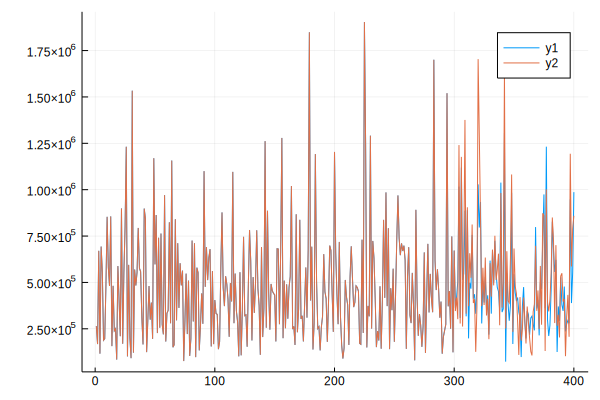

In [24]:
plot([rescale(μ,fac,shift),yprime])

In [25]:
time1 = @elapsed optimize!(gp, method=ConjugateGradient()) 

69.035901763

In [26]:
q

UndefVarError: UndefVarError: q not defined

In [27]:
time2 = @elapsed μ2, σ² = predict_y(gp,adjoint(xprime_norm));

In [28]:
q

UndefVarError: UndefVarError: q not defined

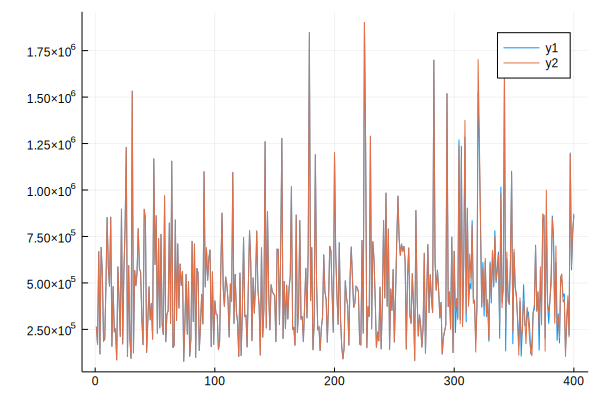

In [29]:
plot([rescale(μ2,fac,shift),yprime])

In [30]:
using DataFrames
df=DataFrame()
df.A =1:400
df.B =rescale(μ2,fac,shift)
CSV.write("y_predict_julia_gaussianprocesses.csv",df, writeheader=false)

"y_predict_julia_gaussianprocesses.csv"

In [31]:
time_df = DataFrame(gaussianprocesses = [time0+time1,time2])

,gaussianprocesses
,Float64
1,69.847
2,0.196887


In [36]:
time_csv = CSV.read("time.csv")

,Column1,Unnamed: 0,gaussianprocesses,pyKriging,GPy
,Int64,Int64,Float64,Float64,Float64
1,0,0,0.257449,57.3157,52.7141
2,1,1,0.0860717,0.0294247,0.016969


In [37]:
time_csv[:gaussianprocesses] = time_df[:gaussianprocesses]

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[37]:1
└ @ Core In[37]:1
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = top-level scope at In[37]:1
└ @ Core In[37]:1


2-element Array{Float64,1}:
 69.847012265
  0.196886932

In [38]:
CSV.write("time.csv", time_csv)

"time.csv"